## Faktor-faktor yang Mempengaruhi Pengkategorian:
- Kata Kunci : Penggunaan kata-kata tertentu yang sering muncul dalam pesan promosi atau scam dapat menjadi indikator kuat untuk pengkategorian.

- Struktur Pesan : Format dan panjang pesan, penggunaan huruf kapital, tanda baca, dan elemen lain dari penulisan bisa memberikan petunjuk tentang jenis pesan.

- Sumber Pesan : Nomor pengirim atau sumber pesan juga bisa menjadi faktor, misalnya pesan dari nomor tidak dikenal atau tidak terdaftar mungkin lebih cenderung dianggap sebagai spam atau scam.

- Konteks Waktu : Waktu pengiriman pesan (misalnya, pesan yang dikirim pada waktu yang tidak biasa) dapat mempengaruhi pengkategorian.

- Konten : Isi pesan itu sendiri, seperti permintaan untuk mengklik tautan, memberikan informasi pribadi, atau melakukan transaksi tertentu, dapat menunjukkan apakah pesan itu promosi, scam, atau normal.

## Masukan Library Yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Masukan DataSet

In [ ]:
data = pd.read_csv('dataset_sms_spam_v1.csv')

In [ ]:
data.head(10)

,teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2
5,5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket ...,2
6,"Ada iRing dgn tarif Rp. 0,1/7hr (perpanjangan ...",2
7,Akhir bulan harus tetap eksis loh! Internetan ...,2
8,Aktifkan iRing Coboy Jr - Terhebat. Tekan *808...,2
9,Ambil bonus harianmu di *600# (Bebas Pulsa). D...,2


In [ ]:
data.shape

(1143, 2)

Data ini memiliki 1143 baris dan 2 kolom

In [ ]:
data.describe()

,label
count,1143.000000
mean,0.711286
std,0.790001
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


Secara umum, karena label bernilai diskrit (bilangan bulat) maka informasi mean, standar deviasi dan kuartil tidak mengandung makna

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


 Tidak ada null values dalam data tersebut, jadi kita dapat langsung masuk ke bagian Exploratory Data Analysis

Index(['teks', 'label', 'Sentiment'], dtype='object')


<ipython-input-22-e3803ad1d89a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=data, palette=['green', 'red', 'yellow'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

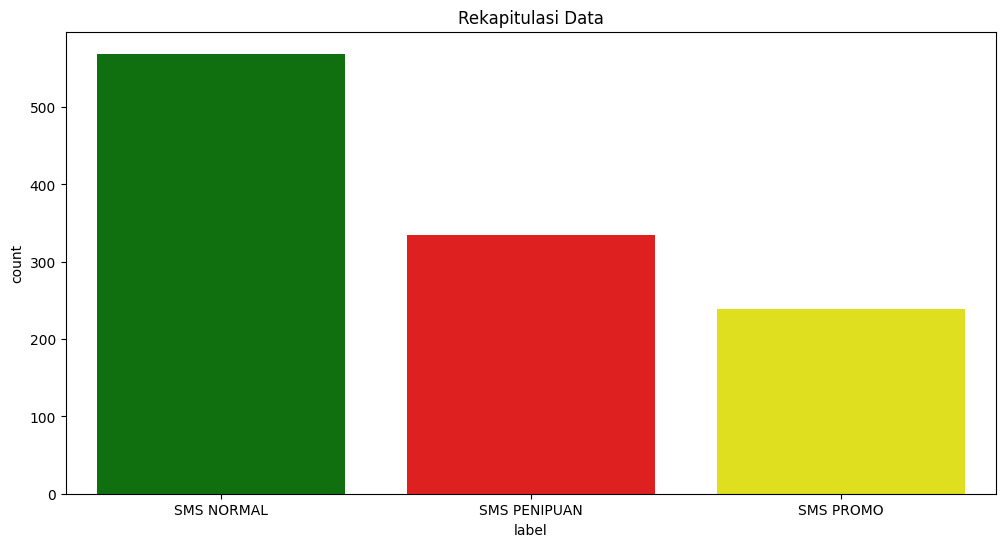

In [ ]:
import seaborn as sns

# Periksa nama kolom
print(data.columns)

# Set the figure size
plt.figure(figsize=(12, 6))

# Membuat grafik countplot
ax = sns.countplot(x='label', data=data, palette=['green', 'red', 'yellow'])

# Mengubah nama label pada sumbu X
ax.set_xticklabels(['SMS NORMAL', 'SMS PENIPUAN', 'SMS PROMO'])

# Menambahkan judul
plt.title('Rekapitulasi Data')

# Menampilkan grafik
plt.show()

In [ ]:
# Definisikan kamus untuk label
kamus = {0: 'SMS Normal',1: 'SMS Penipuan',2: 'SMS Promo'}
data['Sentiment'] = data.label.apply(lambda x: kamus.get(x))

In [ ]:
data.head(1000)

,teks,label,Sentiment
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo
...,...,...,...
995,Perginya naik kelapa turun di pasar bunga wast...,0,SMS Normal
996,Permintaan Anda sedang diproses. Beberapa saat...,0,SMS Normal
997,persiapkan dengan dokumen draftnya diambil di ...,0,SMS Normal
998,Perusahaannya apa aja kalau boleh tau?,0,SMS Normal


In [ ]:
data.shape

(1143, 3)

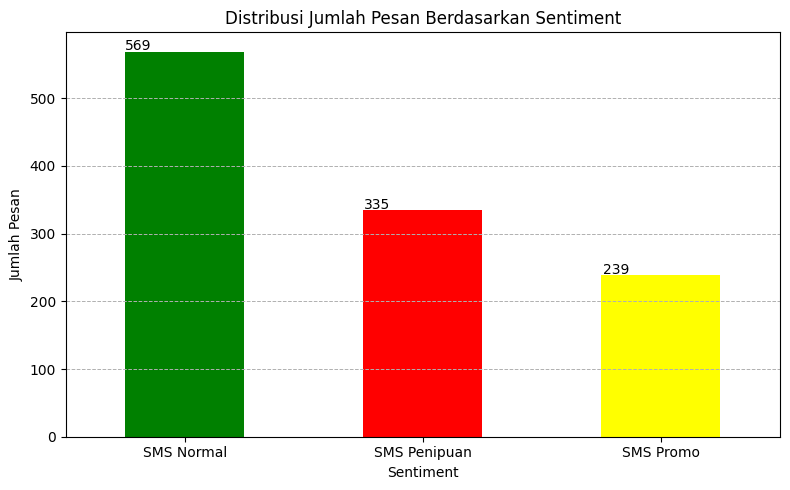

In [ ]:
plt.figure(figsize=(8, 5))
ax = data['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'yellow'])

# Menambahkan judul dan label
plt.title('Distribusi Jumlah Pesan Berdasarkan Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Pesan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Menambahkan angka pada setiap batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Merapikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

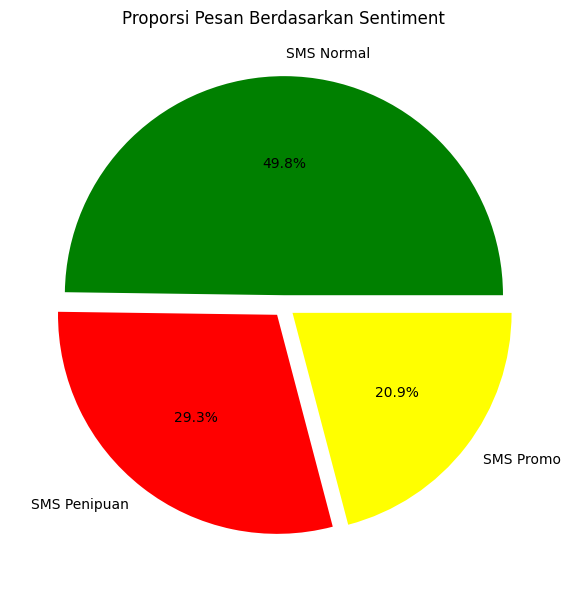

In [ ]:
# Membuat pie chart untuk proporsi pesan berdasarkan Sentiment
plt.figure(figsize=(6, 6))

# Menghitung nilai dan menentukan jarak antar bagian pie chart
sentiment_counts = data['Sentiment'].value_counts()
explode = [0.05] * len(sentiment_counts)  # Memberikan sedikit jarak pada setiap bagian

# Plotting pie chart dengan pemisah yang lebih jelas
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red', 'yellow'], explode=explode)

# Menambahkan judul dan mengatur layout
plt.title('Proporsi Pesan Berdasarkan Sentiment')
plt.ylabel('')  # Menghilangkan label sumbu y
plt.tight_layout()

# Menampilkan pie chart
plt.show()

In [ ]:
import seaborn as sns

# Menghitung jumlah sentiment untuk tiap kategori
cm = sns.light_palette("green", as_cmap=True)
sent_count = data.groupby('Sentiment')['teks'].count().reset_index().sort_values(by = 'teks', ascending = False)
sent_count.style.background_gradient(cmap = 'Purples')

,Sentiment,teks
0,SMS Normal,569
1,SMS Penipuan,335
2,SMS Promo,239


In [ ]:
def char_count(sentence):
  sentence = sentence.replace(" ","")
  return len(sentence)

data['char_count'] = data['teks'].apply(char_count)

<ipython-input-33-cf6efa871852>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'char_count', hue = 'Sentiment', shade = True, data = data)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, y

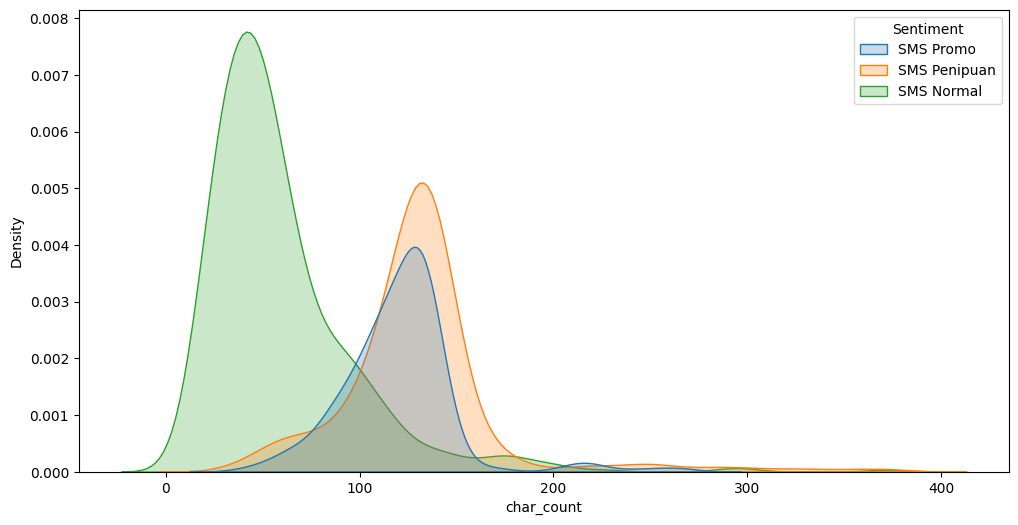

In [ ]:
plt.figure(figsize = (12,6))
sns.kdeplot(x = 'char_count', hue = 'Sentiment', shade = True, data = data)
plt.show()

Rata-rata sentiment yang berbau penipuan memiliki 100-200 huruf

## Text Preprocessing

## Case Folding untuk normalisasi huruf besar-kecil dan proses mengubah semua karakter dalam teks


In [ ]:
import re

# Membuat fungsi untuk case folding

def casefolding(text):
    text = text.lower()                                 # Mengubah menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S', '', text)    # Menghapus url dari dataset
    text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus angka dari dataset
    text = re.sub(r'[^\w\s]', '', text)                 # Menghapus tanda baca
    text = text.strip()
    return text

In [ ]:
# Membandingkan sebelum dan sesudah case folding

raw_sample = data['teks'].iloc[2]
case_folding = casefolding(raw_sample)


print('Raw Data\t :', raw_sample)
print('Case Folding\t :', case_folding)

Raw Data	 : 2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding	 : plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub


## Normalisasi Kata (Word Normalization)

In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word ]['hasil'].values[0]
                     if (key_norm['singkat'] == word).any()
                     else word for word in text.split()
                     ])

    text = str.lower(text)

    return text

In [ ]:
# Membandingkan sebelum dan sesudah Word Normalization

raw_data = data['teks'].iloc[2]
word_normal = text_normalize(case_folding)

print('Raw Data\t : ', raw_data)
print('Case Folding\t :', case_folding)
print('Word Normalize\t :', word_normal)

Raw Data	 :  2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding	 : plg yth sisa kuota flash anda kb download mytelkomsel apps di  utk cek kuotabeli paket flash atau hub
Word Normalize	 : pelanggan yang terhormat sisa kuota flash anda kb download mytelkomsel apps di untuk cek kuotabeli paket flash atau hub


## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Melihat Daftar StopWord Dari NLTK Bahasa Indonesia

stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Membuat Fungsi StopWord Removal

# Menambahkan Kata Ke Dalam StopWord

more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    clear_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clear_words.append(word)

    return " ".join(clear_words)

In [ ]:
raw_sample = data['teks'].iloc[696]
case_folding = casefolding(raw_sample)
stopwords_removal = remove_stop_word(case_folding)

print('Raw Data \t\t :', raw_data)
print('Case Folding \t\t :', case_folding)
print('StopWord Removal \t\t :', stopwords_removal)

Raw Data 		 : 2016-07-08 11:47:11.Plg Yth, sisa kuota Flash Anda 478KB. Download MyTelkomsel apps di http://tsel.me/tsel utk cek kuota&beli paket Flash atau hub *363#
Case Folding 		 : btw magicomnya yg sedang gais gaada yg gede
StopWord Removal 		 : magicomnya yg gais gaada yg gede


## Stemming untuk menghilangkan imbuhan pada suatu kata

In [ ]:
!pip -q install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
# Membuat Kata Menjadi Kata Dasar

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat objek StemmerFactory
factory = StemmerFactory()

# Membuat stemmer
stemmer = factory.create_stemmer()

# Membuat Fungsi Untuk Stemming Bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [ ]:
raw_sample = data['teks'].iloc[690]
case_folding = casefolding(raw_sample)
stopwords_removal = remove_stop_word(case_folding)
text_stemming = stemming(stopwords_removal)


print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('StopWord Removal \t\t :', stopwords_removal)
print('Stemming \t\t :', text_stemming)

Raw Data 		 : Boleh bu, kalau ada yang bakal pindah bulan itu. Kalau tidak keberatan bisa kabarin Bu. Terima kasih.
Case Folding 		 : boleh bu kalau ada yang bakal pindah bulan itu kalau tidak keberatan bisa kabarin bu terima kasih
StopWord Removal 		 : bu pindah keberatan kabarin bu terima kasih
Stemming 		 : bu pindah berat kabarin bu terima kasih


## Text Preprocessing Pipiline

In [ ]:
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [ ]:
%%time
data['clean_text'] = data['teks'].apply(text_preprocessing_process)

CPU times: user 7min 15s, sys: 1.39 s, total: 7min 17s
Wall time: 7min 55s


In [ ]:
data

,teks,label,Sentiment,char_count,clean_text
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,SMS Promo,127,promo beli paket flash my telkomsel app dpt ex...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,SMS Promo,128,rupiah ribu spesial pilih aktif promo sd novem...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,SMS Promo,132,langgan hormat sisa kuota flash kb download my...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,SMS Promo,133,langgan hormat sisa kuota flash kb download my...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,SMS Promo,96,rupiah ribu spesial pilih aktif buru skb
...,...,...,...,...,...
1138,"Yooo sama2, oke nanti aku umumin di grup kelas",0,SMS Normal,38,yooo oke umumin grup kelas
1139,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,0,SMS Normal,44,ga nulis kerudung kirain warna jins
1140,Mba mau kirim 300 ya,0,SMS Normal,16,mbak kirim ya
1141,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,SMS Normal,44,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
# Simpan Data Preprocessing Ke CSV

data.to_csv('clean_data.csv')

In [ ]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

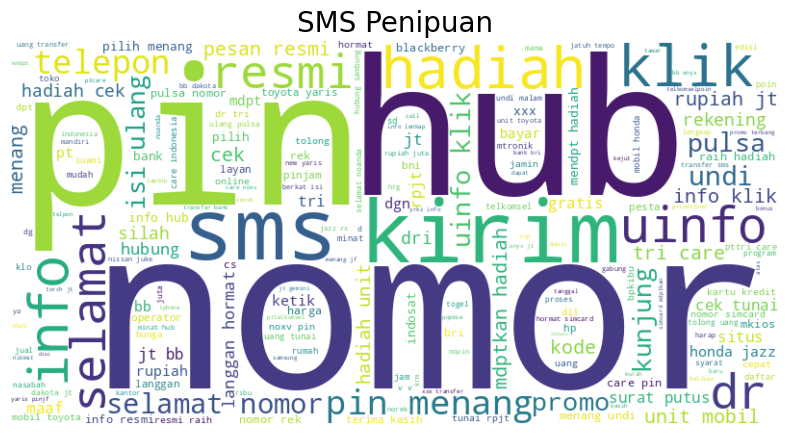

In [ ]:
# Extract texts for each category
sms_penipuan_text = ' '.join(data[data['Sentiment'] == 'SMS Penipuan']['clean_text'])

# Generate word clouds
generate_wordcloud(sms_penipuan_text, title='SMS Penipuan')

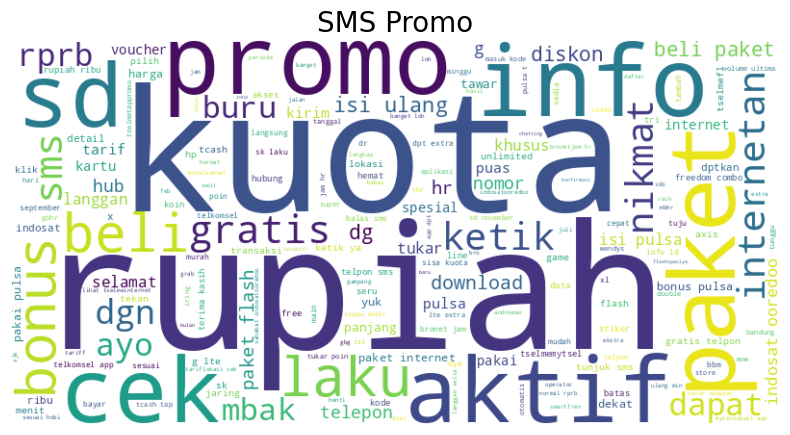

In [ ]:
# Extract texts for each category
sms_promo_text = ' '.join(data[data['Sentiment'] == 'SMS Promo']['clean_text'])

# Generate word clouds
generate_wordcloud(sms_promo_text, title='SMS Promo')

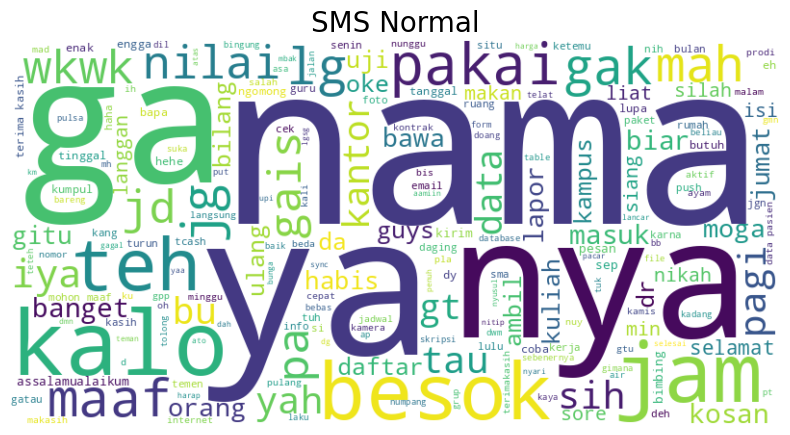

In [ ]:
# Extract texts for each category
sms_normal_text = ' '.join(data[data['Sentiment'] == 'SMS Normal']['clean_text'])

# Generate word clouds
generate_wordcloud(sms_normal_text, title='SMS Normal')

Word clouds menyajikan indikasi kuat tentang intensitas kata. Dengan ukuran font yang lebih besar itu menunjukkan tingkat sentimen lebih kuat atau frekuensi kemunculan lebih tinggi.

In [ ]:
from collections import Counter

# Function to get word frequencies
def get_word_frequencies(text):
    words = text.split()
    word_freq = Counter(words)
    return word_freq

# Function to plot word frequencies
def plot_word_frequencies(word_freq, title=None, num_words=20):
    common_words = word_freq.most_common(num_words)
    words, counts = zip(*common_words)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

<ipython-input-54-fd4b78a38315>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

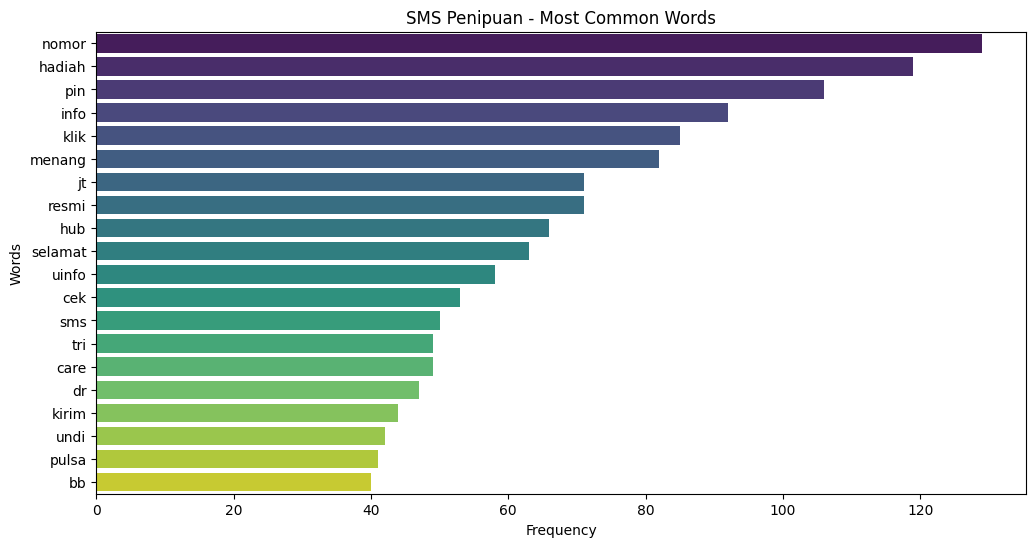

In [ ]:
# Extract texts for each category
sms_penipuan_text = ' '.join(data[data['Sentiment'] == 'SMS Penipuan']['clean_text'])

# Get word frequencies
penipuan_word_freq = get_word_frequencies(sms_penipuan_text)

# Plot word frequencies
plot_word_frequencies(penipuan_word_freq, title='SMS Penipuan - Most Common Words')

Kata yang sering muncul berkaitan dengan nomor, hadia, dan Pin

<ipython-input-54-fd4b78a38315>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

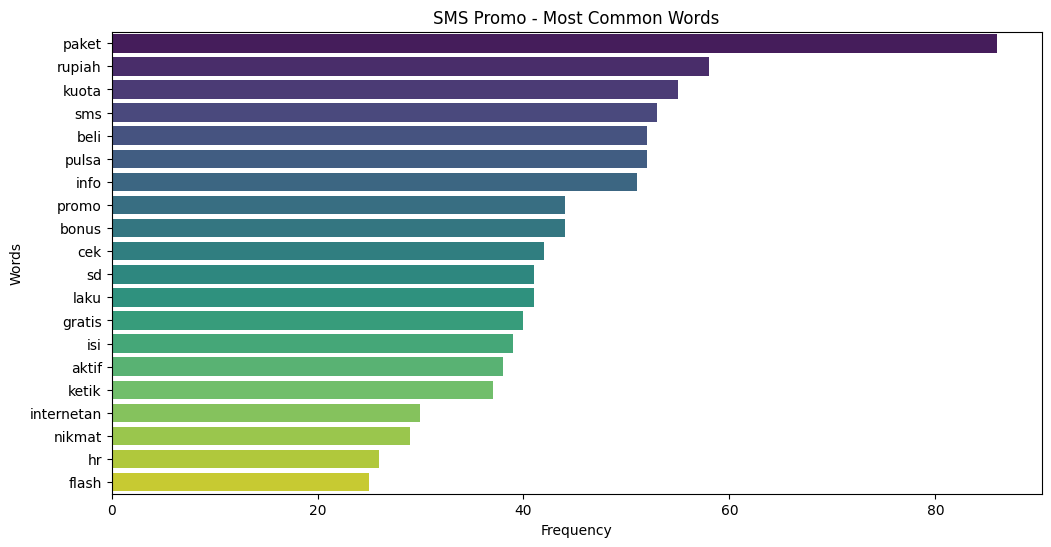

In [ ]:
# Extract texts for each category
sms_promo_text = ' '.join(data[data['Sentiment'] == 'SMS Promo']['clean_text'])

# Get word frequencies
promo_word_freq = get_word_frequencies(sms_promo_text)

# Plot word frequencies
plot_word_frequencies(promo_word_freq, title='SMS Promo - Most Common Words')

Kata yang sering muncul berkaitan dengan paket, rupiah, dan kouta

<ipython-input-54-fd4b78a38315>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-

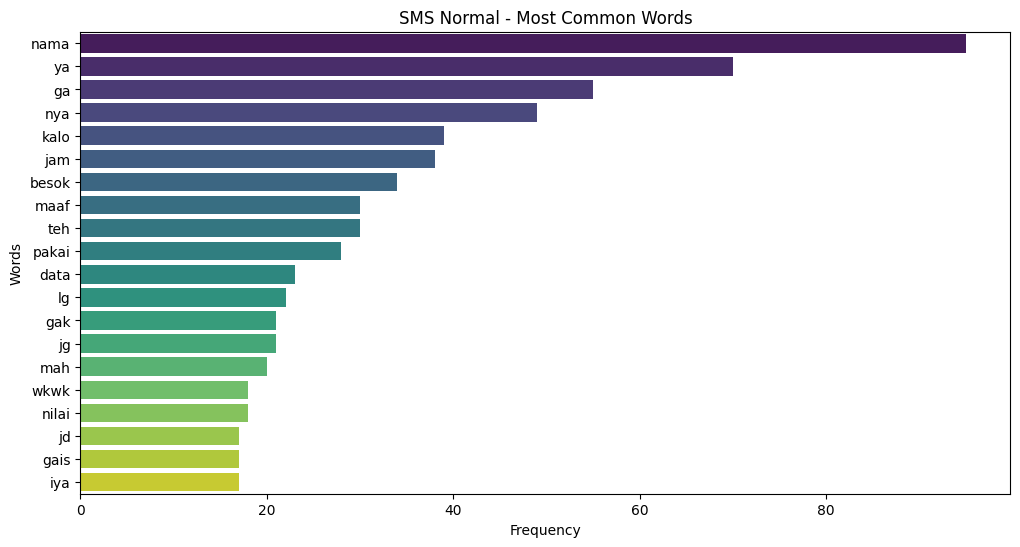

In [ ]:
# Extract texts for each category
sms_normal_text = ' '.join(data[data['Sentiment'] == 'SMS Normal']['clean_text'])

# Get word frequencies
normal_word_freq = get_word_frequencies(sms_normal_text)

# Plot word frequencies
plot_word_frequencies(normal_word_freq, title='SMS Normal - Most Common Words')

Kata yang sering muncul berkaitan dengan nama, ya, dan nya

## Feature Engineeering

In [ ]:
# Memisahkan Kolo Feature Dan Target

x = data['clean_text']
y = data['label']

In [ ]:
x

,clean_text
0,promo beli paket flash my telkomsel app dpt ex...
1,rupiah ribu spesial pilih aktif promo sd novem...
2,langgan hormat sisa kuota flash kb download my...
3,langgan hormat sisa kuota flash kb download my...
4,rupiah ribu spesial pilih aktif buru skb
...,...
1138,yooo oke umumin grup kelas
1139,ga nulis kerudung kirain warna jins
1140,mbak kirim ya
1141,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
y

,label
0,2
1,2
2,2
3,2
4,2
...,...
1138,0
1139,0
1140,0
1141,0


## Feature Extraction (TF-IDF Dan N-Gram)

In [ ]:
# Membuat Model

import pickle

# Membuat TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

# UniGram

vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_, open("feature_tf-idf.sav", "wb"))

 - Jenis N-Gram yang digunakan adalah Unigram (1-Gram). Terlihat dari parameter ngram_range=(1,1) yang disetel dalam objek TfidfVectorizer.

In [ ]:
# Menampilkan Vocabulary Dari TF-IDF

vec_TF_IDF.vocabulary_

{'promo': 2577,
 'beli': 354,
 'paket': 2370,
 'flash': 981,
 'my': 2121,
 'telkomsel': 3173,
 'app': 185,
 'dpt': 821,
 'extra': 952,
 'kuota': 1770,
 'lte': 1887,
 'telpon': 3176,
 'mnthr': 2072,
 'buru': 511,
 'cek': 553,
 'tselmemytsel': 3311,
 'sk': 2990,
 'rupiah': 2798,
 'ribu': 2735,
 'spesial': 3049,
 'pilih': 2457,
 'aktif': 86,
 'sd': 2852,
 'november': 2263,
 'langgan': 1801,
 'hormat': 1259,
 'sisa': 2982,
 'kb': 1590,
 'download': 817,
 'mytelkomsel': 2123,
 'apps': 190,
 'kuotabeli': 1771,
 'hub': 1278,
 'skb': 2991,
 'ekstra': 898,
 'pulsa': 2614,
 'dg': 716,
 'internet': 1382,
 'bulan': 497,
 'sjk': 2989,
 'augsept': 242,
 'detail': 711,
 'iring': 1406,
 'dgn': 717,
 'tarif': 3140,
 'hr': 1268,
 'panjang': 2383,
 'hits': 1247,
 'armada': 205,
 'curi': 641,
 'hati': 1207,
 'tekan': 3167,
 'okcall': 2317,
 'info': 1342,
 'eks': 895,
 'loh': 1873,
 'internetan': 1383,
 'pakai': 2368,
 'volume': 3433,
 'ultima': 3367,
 'mbhr': 1979,
 'hrga': 1271,
 'tariflokasi': 3142,
 't

In [ ]:
# Melihat Jumlah Feature

print(len(vec_TF_IDF.get_feature_names_out()))

3558


In [ ]:
# Melihat Fitur Apa Saja Yang Ada Dalam Corpus

print(vec_TF_IDF.get_feature_names_out())

['aa' 'aamiiiin' 'aamiin' ... 'zjt' 'zona' 'ztkm']


In [ ]:
x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acara,acaratks,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_tabular_tf_idf.iloc[10:20, 60:70]

,agus,agust,agustus,agustuskunjungi,ah,ahaha,ahayatourtravelcom,ahub,aidzin,aigoo
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [ ]:
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Inisialisasi SelectKBest dengan chi2 untuk memilih 3000 fitur terbaik
chi2_features = SelectKBest(chi2, k=3000)

# Melakukan seleksi fitur dan transformasi pada x_train dan y_train
x_kbest_feature = chi2_features.fit_transform(x_train, y_train)

# Menampilkan jumlah fitur sebelum dan setelah seleksi
print('Original Feature Number:', x_train.shape[1])
print('Reduced Feature Number:', x_kbest_feature.shape[1])

Original Feature Number: 3415
Reduced Feature Number: 3000


In [ ]:
Data = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
Data

,Nilai
0,0.843018
1,0.419698
2,1.558607
3,0.686416
4,0.759870
...,...
3410,1.126664
3411,0.503012
3412,0.686416
3413,2.917329


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer


x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

# Inisialisasi SelectKBest dengan chi2 untuk memilih 3000 fitur terbaik
chi2_features = SelectKBest(chi2, k=3000)

# Melakukan seleksi fitur dan transformasi pada x_train dan y_train
x_kbest_feature = chi2_features.fit_transform(x_train, y_train)

# Menampilkan jumlah fitur sebelum dan setelah seleksi
print('Original Feature Number:', x_train.shape[1])
print('Reduced Feature Number:', x_kbest_feature.shape[1])

# Mendapatkan skor chi2 untuk setiap fitur
scores = chi2_features.scores_

# Mendapatkan nama fitur dari vec_TF_IDF
feature_names = vec_TF_IDF.get_feature_names_out()

# Membuat DataFrame dari skor chi2
Data = pd.DataFrame({'Nilai': scores})

# Memastikan panjang feature_names sesuai dengan panjang Data
if len(feature_names) == len(Data):
    Data['Fitur'] = feature_names
else:
    print("Panjang feature_names tidak cocok dengan panjang Data.")

print(Data)

Original Feature Number: 3415
Reduced Feature Number: 3000
         Nilai     Fitur
0     0.843018        aa
1     0.419698  aamiiiin
2     1.558607    aamiin
3     0.686416        ab
4     0.759870     abadi
...        ...       ...
3410  1.126664    zalora
3411  0.503012   zarkasi
3412  0.686416       zjt
3413  2.917329      zona
3414  0.835998      ztkm

[3415 rows x 2 columns]


In [ ]:
# Mengurutkan Nilai Fitur Terbaik

Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2224,48.922113,paket
1643,45.004572,kuota
1096,43.663894,hadiah
2314,36.955677,pin
355,33.962373,beli
...,...,...
1612,0.044910,kopi
339,0.044468,bca
1789,0.031575,maksimal
3282,0.012716,via


In [ ]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# Menampilkan Fitur Yang Terpilih Berdasarkan Nilai Musk Dan Chi Tertinggi

new_feature =[]
for bool, f in zip(mask, feature_names):
    if bool :
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aa',
 'aamiiiin',
 'aamiin',
 'ab',
 'abadi',
 'abai',
 'abbee',
 'abdul',
 'acaratks',
 'account',
 'ada',
 'adapromo',
 'adi',
 'adiahbankbriblogspotcoid',
 'adiahbriblogspotcom',
 'adiahcareblogspotcom',
 'adiahindosatblogspotcom',
 'adiahkejutangbriblogspotcom',
 'adiahlptcareblogspotcom',
 'adiahmkiosblogspotcom',
 'adiahmtroniktk',
 'adiahpoinblogspotcom',
 'adiahptaxisblogspotcoid',
 'adiahptcareblogspotcom',
 'adiahptmkiosblogspotcom',
 'adiahramadhanblogspotcom',
 'adiahresmimkiosblogspotcom',
 'adiahtcareblogspotcom',
 'adiahtricareblogspotcoid',
 'adiahtricareblogspotcom',
 'adiahtricarecom',
 'adik',
 'adison',
 'admin',
 'administrasi',
 'adminlte',
 'ado',
 'adrian',
 'adu',
 'aduh',
 'advertising',
 'aea',
 'aesthetic',
 'afbe',
 'affc',
 'afr',
 'afrika',
 'agam',
 'agamascellcom',
 'agen',
 'agendain',
 'agenpulsa',
 'ags',
 'agst',
 'agsts',
 'agt',
 'agtskinfodlj',
 'agua',
 'agun',
 'agus',
 'agust',
 'agustuskunjungi',
 'ahaha',
 'ahayatourtravelcom',
 'ahub',
 '

In [ ]:
# Membuat Vocabulary Baru Berdasarkan Fitur Yang Telah Di Seleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
new_selected_feature

{'promo': 2431,
 'beli': 355,
 'paket': 2224,
 'flash': 936,
 'my': 1975,
 'telkomsel': 3028,
 'app': 186,
 'extra': 907,
 'kuota': 1643,
 'lte': 1747,
 'telpon': 3031,
 'mnthr': 1926,
 'buru': 512,
 'cek': 554,
 'tselmemytsel': 3168,
 'sk': 2844,
 'rupiah': 2652,
 'ribu': 2589,
 'spesial': 2903,
 'pilih': 2311,
 'aktif': 86,
 'sd': 2706,
 'november': 2117,
 'pulang': 2466,
 'hormat': 1184,
 'sisa': 2836,
 'kb': 1491,
 'download': 786,
 'mytelkomsel': 1977,
 'apps': 191,
 'kuotabeli': 1644,
 'hubung': 1208,
 'skb': 2845,
 'ekstra': 857,
 'pulsa': 2468,
 'internet': 1295,
 'bulan': 498,
 'sjk': 2843,
 'augsept': 243,
 'detail': 698,
 'iring': 1318,
 'tarif': 2994,
 'panjang': 2237,
 'hits': 1172,
 'armada': 206,
 'curi': 633,
 'hati': 1135,
 'tekan': 3022,
 'okcall': 2171,
 'informasi': 1264,
 'eks': 854,
 'loh': 1734,
 'internetan': 1296,
 'pakai': 2222,
 'volume': 3290,
 'ultima': 3224,
 'mbhr': 1833,
 'harga': 1123,
 'tariflokasi': 2996,
 'tselmefl': 3166,
 'coboy': 601,
 'jr': 1407,

In [ ]:
# Menampilkan Berapa Banyak Fitur Yang Terpilih

len(new_selected_feature)

3000

In [ ]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav", "wb"))

In [ ]:
# Menampilkan Fitur-Fitur Yang Sudah Di Seleksi


data_selected_feature = pd.DataFrame(x_kbest_feature, columns=selected_feature)
data_selected_feature

,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,acaratks,account,...,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zjt,zona,ztkm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling (Pemodelan) Naive Bayes

In [ ]:
selected_x = x_kbest_feature
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Imporr Library Yang Di Pake

import random
from sklearn.model_selection import train_test_split

# Import Algoritma Naive Bayes

from sklearn.naive_bayes import MultinomialNB

In [ ]:
x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Menampilkan Jumlah Data Training Dan Testing

print('Banyaknya X_train :', len(x_train))
print('Banyaknya X_test :', len(x_test))
print('Banyaknya Y_train :', len(y_train))
print('Banyaknya Y_test :', len(y_train))

Banyaknya X_train : 914
Banyaknya X_test : 229
Banyaknya Y_train : 914
Banyaknya Y_test : 914


In [ ]:
# Proses Traning Menggunakan Algoritma Naive Bayes

text_algorithm = MultinomialNB()

In [ ]:
model = text_algorithm.fit(x_train, y_train)

In [ ]:
# Membuat Model Prediksi

data_input = ("promo beli paket flash my telkomsel app extra kuota lte extra telpon mnthr buru cek tselmemytsel sk")
data_input = text_preprocessing_process(data_input)

# Load TF-IDF

tfidf = TfidfVectorizer

loader_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loader_vec.fit_transform([data_input]))

if(hasil == 0):
    s = "SMS Normal"
elif(hasil == 1):
    s = "SMS Penipuan"
else:
    s = "SMS Promo"

print("Hasil Prediksi : \n", s)


Hasil Prediksi : 
 SMS Promo


In [ ]:
# Membuat Model Prediksi

data_input = ("transfer uang rekening bni an ismawati rek sms kirim")
data_input = text_preprocessing_process(data_input)

# Load TF-IDF

tfidf = TfidfVectorizer

loader_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loader_vec.fit_transform([data_input]))

if(hasil == 0):
    s = "SMS Normal"
elif(hasil == 1):
    s = "SMS Penipuan"
else:
    s = "SMS Promo"

print("Hasil Prediksi : \n", s)


Hasil Prediksi : 
 SMS Penipuan


In [ ]:
# Membuat Model Prediksi

data_input = ("nama note nama dinamic emil kembaliin nama gmana")
data_input = text_preprocessing_process(data_input)

# Load TF-IDF

tfidf = TfidfVectorizer

loader_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loader_vec.fit_transform([data_input]))

if(hasil == 0):
    s = "SMS Normal"
elif(hasil == 1):
    s = "SMS Penipuan"
else:
    s = "SMS Promo"

print("Hasil Prediksi : \n", s)


Hasil Prediksi : 
 SMS Normal


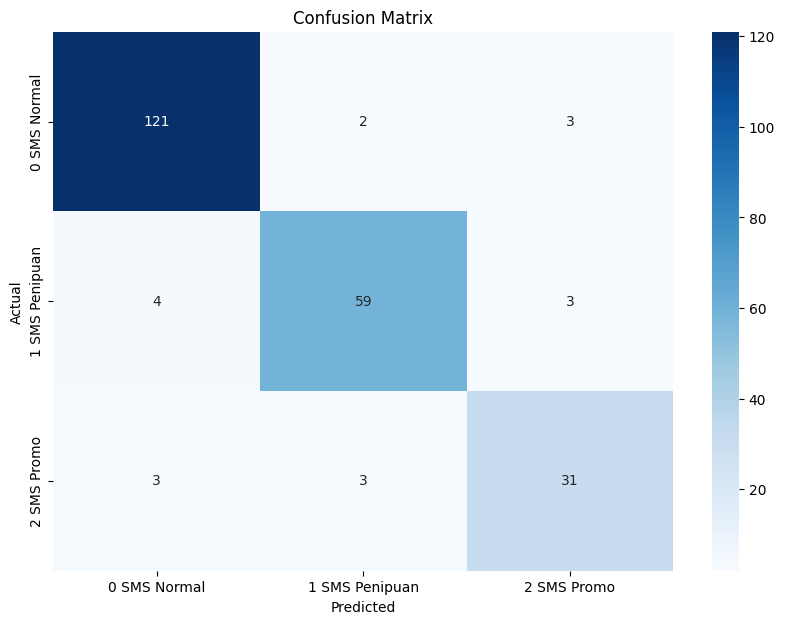

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Ensure you have your trained model and test data
# The trained model and the test data should be available as `model`, `x_test`, and `y_test`

# Predict the test set results
y_pred = model.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['0 SMS Normal', '1 SMS Penipuan', '2 SMS Promo'], columns=['0 SMS Normal', '1 SMS Penipuan', '2 SMS Promo'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

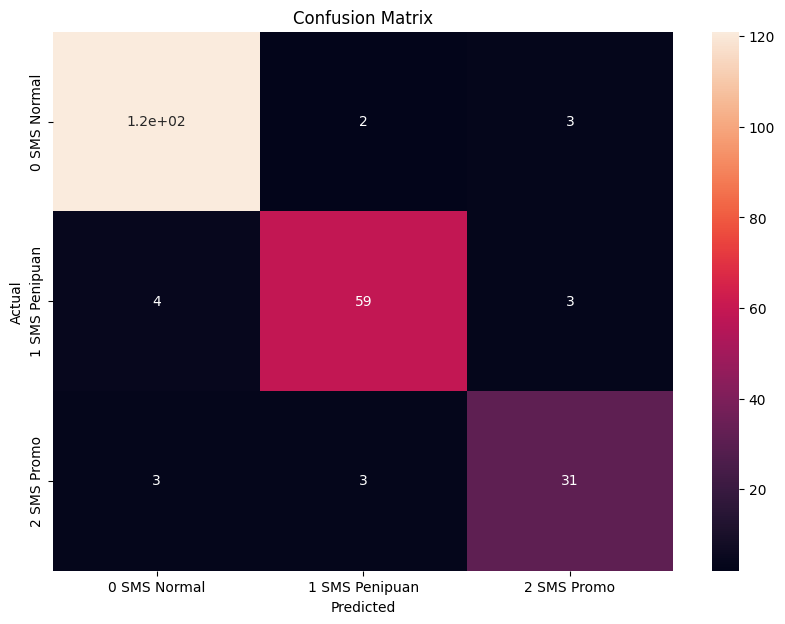

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Ensure you have your trained model and test data
# The trained model and the test data should be available as `model`, `x_test`, and `y_test`

# Predict the test set results
y_pred = model.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=['0 SMS Normal', '1 SMS Penipuan', '2 SMS Promo'], columns=['0 SMS Normal', '1 SMS Penipuan', '2 SMS Promo'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True,)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Arti heatmap diatas :

- Model berhasil memprediksi secara benar 121 pesan SMS normal, namun 2 SMS pesan biasa diprediksi SMS penipuan dan 3 SMS pesan  diprediksi promo

- Model berhasil memprediksi secara benar 59 SMS pesan penipuan, namun 4 SMS pesan diprediksi SMS normal dan 3 SMS pesan diprediksi promo.

- Model berhasil memprediksi secara benar 31 SMS pesan promo, namun 3 SMS pesan diprediksi SMS normal dan 3 SMS pesan diprediksi penipuan

## Evaluasi Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menghitung accuracy
accuracy = accuracy_score(y_test, y_pred)

# Menghitung precision, recall, dan f1 dengan average='macro'
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[121   2   3]
 [  4  59   3]
 [  3   3  31]]
Accuracy: 0.9213973799126638
Precision: 0.9016751126126126
Recall: 0.8973648973648974
F1 Score: 0.8994286836806521


In [ ]:
# Optionally, print the classification report for more detailed metrics
print(classification_report(y_test, y_pred, target_names=['0 SMS Normal', '1 SMS Penipuan', '2 SMS Promo']))

                precision    recall  f1-score   support

  0 SMS Normal       0.95      0.96      0.95       126
1 SMS Penipuan       0.92      0.89      0.91        66
   2 SMS Promo       0.84      0.84      0.84        37

      accuracy                           0.92       229
     macro avg       0.90      0.90      0.90       229
  weighted avg       0.92      0.92      0.92       229



KETERANGAN UNTUK PREDIKSI SMS PENIPUAN
- Label 0 = SMS Normal
- Label 1 = SMS Penipuan
- Label 2 = SMS Promo

Accurasi Precision  Model Yang Di Bangun  0.90   
- SMS Normal (0) Mempunyai Nilai precision 0.95
- SMS Penipuan (1) Mempunyai Nilai precision 0.92
- SMS Promo (2) Mempunyai Nilai precision 0.84

Accurasi Recall Model Yang Di Bangun  0.90
- SMS Normal (0) Mempunyai Nilai recall 0.96
- SMS Penipuan (1) Mempunyai Nilai recall 0.89
- SMS Promo (2) Mempunyai Nilai recall 0.84

Accurasi F1-score Model Yang Di Bangun  0.92
- SMS Normal (0) Mempunyai Nilai f1-score 0.95
- SMS Penipuan (1) Mempunyai Nilai f1-score 0.91
- SMS Promo (2) Mempunyai Nilai f1-score 0.84


In [ ]:
# Menyimpan Model KE .SAV Untuk Di Masukan Ke Streamlit

pickle.dump(model,open("model_fraud.sav", "wb"))